In [24]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import numpy as np

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [26]:
input_shape=x_train.shape [1:]
input_shape

(32, 32, 3)

In [27]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [28]:
y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)

In [49]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3),strides=(2,2),padding='same', activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3,3),strides=(2,2),padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3,3),strides=(2,2),padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 16, 16, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,553,482 (5.93 MB)

 Trainable params: 1,553,482 (5.93 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss=keras.losses.categorical_crossentropy,  optimizer=keras.optimizers.AdamW(), metrics=['accuracy'])

In [57]:
result = model.fit(x_train, y_train, batch_size=250, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7242 - loss: 0.7749 - val_accuracy: 0.7025 - val_loss: 0.8580
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7246 - loss: 0.7668 - val_accuracy: 0.6926 - val_loss: 0.9023
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7260 - loss: 0.7605 - val_accuracy: 0.7091 - val_loss: 0.8480
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7313 - loss: 0.7567 - val_accuracy: 0.7103 - val_loss: 0.8351
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7293 - loss: 0.7609 - val_accuracy: 0.7107 - val_loss: 0.8462
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7317 - loss: 0.7535 - val_accuracy: 0.7184 - val_loss: 0.8323
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7353 - loss: 0.7502 - val_accuracy: 0.7131 - val_loss: 0.8310
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7349 - loss: 0.7447 - val_accu

Text(0, 0.5, 'loss')

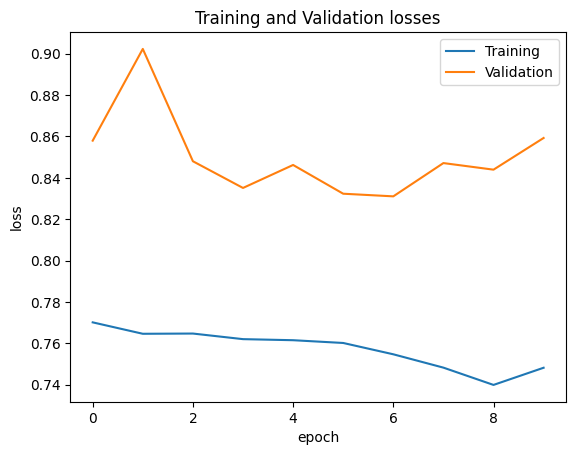

In [58]:
result.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',1 -  score[0])
print('Test accuracy:', score[1])

Test loss: -1.083580732345581
Test accuracy: 0.5486000180244446


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)[:5]
label = np.argmax(y_test,axis=1)[:5]
print(pred)
print(label)

[7 2 1 0 4]
[7 2 1 0 4]


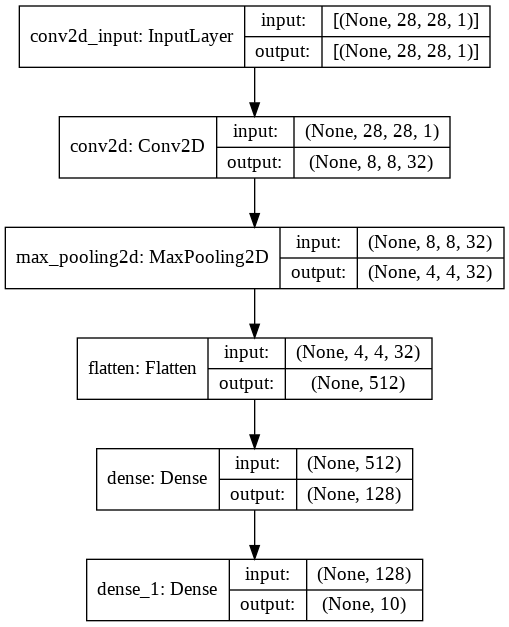

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
